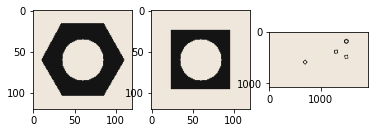

In [1]:


import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()



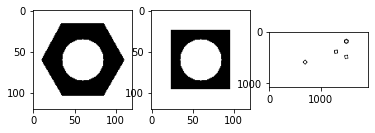

hexnut_template_gray threshold value is  20.0
squarenut_template_gray threshold value is  20.0
conveyor_f100_gray threshold value is  20.0


In [2]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)

ret1,th1 = cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(th1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(th2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(th3, cv.COLOR_RGB2BGR))
plt.show()

print("hexnut_template_gray threshold value is ", ret1)
print("squarenut_template_gray threshold value is ", ret2)
print("conveyor_f100_gray threshold value is ", ret3)




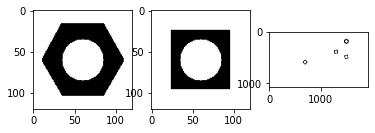

In [3]:
kernel = np.ones((3,3),np.uint8)

hexnut_template_gray_closing = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
squarenut_template_gray_closing = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
conveyor_f100_gray_closing = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template_gray_closing, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template_gray_closing, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100_gray_closing, cv.COLOR_RGB2BGR))
plt.show()

In [4]:
import numpy as np
connectivity = 8
retval, labels, stats, centroids = cv.connectedComponentsWithStats(th3, cv.CV_32S, connectivity )
print(retval)
print(labels)
print(stats)
print(centroids)


6
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[    650     150     896     501   13938]
 [      0       0    1920    1080 2051818]
 [   1475     175      51      51    1961]
 [   1275     375      51      51    1961]
 [   1475     475      51      51    1961]
 [    675     575      51      51    1961]]
[[1274.92050509  400.1106328 ]
 [ 956.24678115  540.8845999 ]
 [1500.          200.        ]
 [1300.          400.        ]
 [1500.          500.        ]
 [ 700.          600.        ]]


In [5]:
th3.shape

(1080, 1920)

In [6]:
labels.shape

(1080, 1920)

In [7]:
contours1, hierarchy1	=	cv.findContours(th1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2	=	cv.findContours(th2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours3, hierarchy3	=	cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [8]:
cv.drawContours(hexnut_template, contours1, 1, (0,255,0), 1)
cv.drawContours(squarenut_template, contours2, 1, (0,255,0), 1)
cv.drawContours(conveyor_f100, contours2,1, (0,255,0), 1)

array([[[219, 231, 239],
        [219, 231, 239],
        [219, 231, 239],
        ...,
        [219, 231, 239],
        [219, 231, 239],
        [219, 231, 239]],

       [[219, 231, 239],
        [219, 231, 239],
        [219, 231, 239],
        ...,
        [219, 231, 239],
        [219, 231, 239],
        [219, 231, 239]],

       [[219, 231, 239],
        [219, 231, 239],
        [219, 231, 239],
        ...,
        [219, 231, 239],
        [219, 231, 239],
        [219, 231, 239]],

       ...,

       [[219, 231, 239],
        [219, 231, 239],
        [219, 231, 239],
        ...,
        [219, 231, 239],
        [219, 231, 239],
        [219, 231, 239]],

       [[219, 231, 239],
        [219, 231, 239],
        [219, 231, 239],
        ...,
        [219, 231, 239],
        [219, 231, 239],
        [219, 231, 239]],

       [[219, 231, 239],
        [219, 231, 239],
        [219, 231, 239],
        ...,
        [219, 231, 239],
        [219, 231, 239],
        [219, 231, 239]]

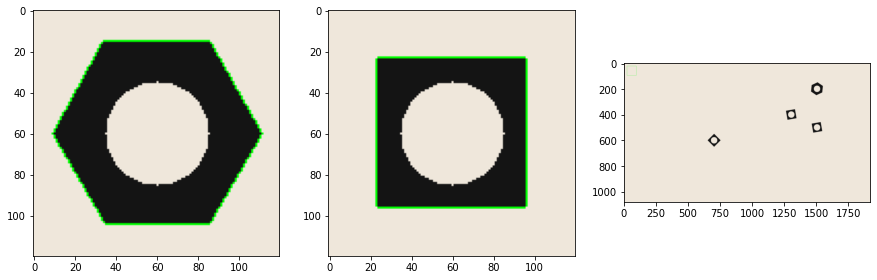

In [9]:
fig, ax = plt. subplots(1,3, figsize=(15,15))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

In [10]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame_ = []      
while cap.isOpened():                                    
    ret, frame = cap.read()  
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    frame_.append(frame.copy())

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


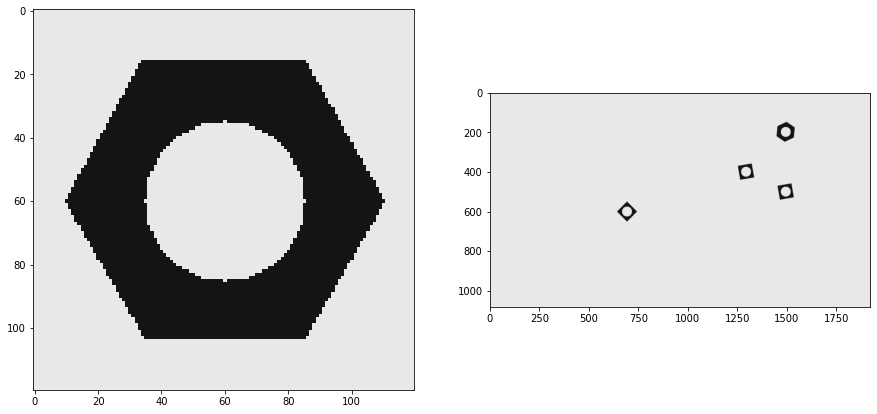

0.03193585351388317
0.031935853514169166
0.03193585351409767
0.031935853514079904
0.12370592020839433
2.220446049250313e-16
0.00015490524765238156
0.00015490524765238156
0.026908962781344137
1


In [11]:
img1 = cv.imread('hexnut_template.png',0)
img2 = cv.imread('conveyor_f101.png',0)

fig, ax = plt. subplots(1,2, figsize=(15,15))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(img2, cv.COLOR_RGB2BGR))
plt.show()


ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[1]
contours,hierarchy = cv.findContours(thresh2,2,1)
match_count = 0
for i in contours:
    cnt2 = i
    ret = cv.matchShapes(cnt1,cnt2,1,0.0)
    print(ret)
    if ret < 0.00001:
        match_count+=1
print( match_count )

In [12]:
img1 = cv.imread('hexnut_template.png',0)
img2 =  cv.imread('squarenut_template.png',0)
img3 =  cv.imread('conveyor_f100.png',0)
img4 = cv.imread('conveyor_f101.png',0)

ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
ret, thresh3 = cv.threshold(img3, 127, 255,0)
ret, thresh4 = cv.threshold(img4, 127, 255,0)

contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[1]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[1]

contours,hierarchy = cv.findContours(thresh3,2,1)
cnt3 = contours
Hex_count = 0
square_count = 0

for i in cnt3:
    ret1 = cv.matchShapes(i,cnt1,1,0.0)
    if ret1 < 0.0001:
        Hex_count+=1
    ret2 = cv.matchShapes(i, cnt2, 1, 0.0)

    if ret2 < 0.001:
        square_count+=1
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
img = img3.copy()
cv.putText(img,"Hexaganol:" + str(Hex_count) , (100, 130), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
cv.putText(img,"square:" + str(square_count) , (100, 100), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
cv.imshow('Conveyor', img)
cv.waitKey(0)
cv.destroyAllWindows()


contours,hierarchy = cv.findContours(thresh4,2,1)
cnt4 = contours
Hex_count = 0
square_count = 0

for i in cnt4:
    ret1 = cv.matchShapes(i,cnt1,1,0.0)
    if ret1 < 0.0001:
        Hex_count+=1
    ret2 = cv.matchShapes(i, cnt2, 1, 0.0)

    if ret2 < 0.001:
        square_count+=1
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
img = img4.copy()
cv.putText(img,"Hexaganol:" + str(Hex_count) , (100, 130), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
cv.putText(img,"square:" + str(square_count) , (100, 100), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
cv.imshow('Conveyor', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [35]:
# Yor code here.
frame_array = []
for fr in frame_[:]:
    fr = cv.cvtColor(fr, cv.COLOR_BGR2GRAY)                                  # area of hexagonal: 6730,6800 +-100
    ret, thresh = cv.threshold(fr, 127, 255,0)                              #area of square : 5200+-20
    contours,hierarchy = cv.findContours(thresh,2,1)                           #area of inside circle: 1890
    square_count = 0
    Hex_count = 0
    for con in contours:
        area = cv.contourArea(con)
        if (6715< area <6815):
            # ret1 = cv.matchShapes(fr,cnt1,1,0.0)
            # if ret1 < 0.0001:
                Hex_count+=1
        if (5150< area <5250):
            # ret2 = cv.matchShapes(fr, cnt2, 1, 0.0)
            # if ret2 < 0.001:
                square_count+=1
        # if not (6715< area <6815):break
    img = fr.copy()
    cv.putText(img,"Hexaganol:" + str(Hex_count) , (100, 130), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
    cv.putText(img,"square:" + str(square_count) , (100, 100), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv.LINE_AA)
    frame_array.append(img)


# Your code here


out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

